In [873]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import re

# Read in and reformat all our feature data
# # TSA (Tropical Southern Atlantic Index)

In [770]:
df = pd.read_csv('tsa.data.txt', delim_whitespace=True).reset_index().transpose().reset_index(drop=True)
headers = df.iloc[0]
df = df[1:].copy()
df.columns = headers
df.head()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,-99.99,TSAa
1,-0.22,-0.19,0.08,-0.98,0.06,-0.15,-0.43,-0.42,-0.5,-0.37,...,-0.32,0.39,0.11,0.43,0.81,0.58,0.62,0.75,NaN,NaN
2,-0.12,0.01,0.15,-0.7,-0.01,-0.25,-0.5,-0.6,-0.69,-0.11,...,-0.51,0.25,0.22,0.42,0.59,0.09,-0.01,0.68,NaN,NaN
3,0.04,-0.01,0.12,-0.87,-0.08,0.01,-0.52,-0.45,-0.57,-0.07,...,-0.08,0.26,0.22,0.23,0.6,0.29,0.17,1.02,NaN,NaN
4,-0.21,0.22,-0.17,-0.51,-0.08,-0.29,-0.4,-0.52,-0.73,-0.03,...,-0.33,0.35,0.23,0.36,0.39,0.4,0.28,0.65,NaN,NaN
5,-0.4,0.08,-0.34,-0.37,-0.19,-0.14,-0.61,-0.34,-0.45,-0.26,...,-0.04,0.48,0.48,0.46,0.35,0.47,0.28,0.65,NaN,NaN


In [771]:
new_df = df.drop(['1948', '1949'], axis=1)
new_df.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,-99.99,TSAa
1,0.08,-0.98,0.06,-0.15,-0.43,-0.42,-0.5,-0.37,-0.26,0.04,...,-0.32,0.39,0.11,0.43,0.81,0.58,0.62,0.75,NaN,NaN
2,0.15,-0.7,-0.01,-0.25,-0.5,-0.6,-0.69,-0.11,-0.26,0.05,...,-0.51,0.25,0.22,0.42,0.59,0.09,-0.01,0.68,NaN,NaN
3,0.12,-0.87,-0.08,0.01,-0.52,-0.45,-0.57,-0.07,-0.57,0.28,...,-0.08,0.26,0.22,0.23,0.6,0.29,0.17,1.02,NaN,NaN
4,-0.17,-0.51,-0.08,-0.29,-0.4,-0.52,-0.73,-0.03,-0.63,0.2,...,-0.33,0.35,0.23,0.36,0.39,0.4,0.28,0.65,NaN,NaN
5,-0.34,-0.37,-0.19,-0.14,-0.61,-0.34,-0.45,-0.26,-1.07,-0.17,...,-0.04,0.48,0.48,0.46,0.35,0.47,0.28,0.65,NaN,NaN


In [772]:
# start 1950
# end 2019
tsa = new_df.drop(['-99.99', 'TSAa'], axis=1)
tsa

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0.08,-0.98,0.06,-0.15,-0.43,-0.42,-0.5,-0.37,-0.26,0.04,...,0.79,0.45,-0.32,0.39,0.11,0.43,0.81,0.58,0.62,0.75
2,0.15,-0.7,-0.01,-0.25,-0.5,-0.6,-0.69,-0.11,-0.26,0.05,...,0.68,0.59,-0.51,0.25,0.22,0.42,0.59,0.09,-0.01,0.68
3,0.12,-0.87,-0.08,0.01,-0.52,-0.45,-0.57,-0.07,-0.57,0.28,...,0.89,0.72,-0.08,0.26,0.22,0.23,0.6,0.29,0.17,1.02
4,-0.17,-0.51,-0.08,-0.29,-0.4,-0.52,-0.73,-0.03,-0.63,0.2,...,0.68,0.49,-0.33,0.35,0.23,0.36,0.39,0.4,0.28,0.65
5,-0.34,-0.37,-0.19,-0.14,-0.61,-0.34,-0.45,-0.26,-1.07,-0.17,...,0.62,0.3,-0.04,0.48,0.48,0.46,0.35,0.47,0.28,0.65
6,-0.23,-0.26,0.07,-0.1,-0.57,-0.44,-0.43,-0.11,-1.06,-0.14,...,0.85,0.2,0.04,0.28,0.47,0.38,0.68,0.57,0.46,0.58
7,-0.16,-0.11,-0.07,-0.07,-0.66,-0.27,-0.26,-0.31,-0.51,-0.24,...,0.6,0.27,-0.03,0.23,0.17,0.07,0.63,0.35,0.38,0.5
8,-0.34,0.05,-0.01,-0.06,-0.39,-0.46,-0.19,-0.21,-0.64,-0.2,...,0.48,0.2,-0.08,0.25,0.24,-0.11,0.52,0.59,0.41,0.41
9,-0.51,0.05,-0.04,0.04,-0.25,-0.41,-0.19,-0.35,-0.63,-0.1,...,0.23,0.24,0.02,0.03,0.26,-0.04,0.26,0.27,0.36,0.09
10,-0.54,0.03,-0.08,0.03,-0.14,-0.28,-0.44,-0.38,-0.49,-0.13,...,0.43,0.28,0.03,0.04,0.16,0.28,0.46,0.42,0.53,-99.99


# take avg TSA from hurricane months (June-Oct) per year to get 1 value
# 6, 7, 8, 9, 10
# for each year, we want one value so we can merge on year in the hurdat dataset

In [773]:
# take avg TSA from hurricane months (June-Oct) per year to get 1 value
# 6, 7, 8, 9, 10
# for each year, we want one value so we can merge on year in the hurdat dataset

# avg TSA for a single year would look like this:
# df2['1950'][6:11].mean()

# we need avg TSA for the years 1950-2019
# we need to loop through the required range and append the averages to a list
# ...will need to fudge one number for 2019 in Oct (10)

# for idx, row in df2.loc[5:10].iterrows():
#     print(row['1950'])
    

In [774]:
def hurfunc(col):
    return col.iloc[6:11].mean()

hurfunc(df2['1950'])

-0.402

In [775]:
# list of avg TSA for every year and in the desired period

tsa_list = []

for col in tsa.columns:
    tsa_list.append(hurfunc(tsa[col]))
print(tsa_list)

[-0.402, -0.012, -0.04, -0.048, -0.312, -0.32399999999999995, -0.302, -0.302, -0.5319999999999999, -0.178, -0.016000000000000004, -0.09, -0.032, 0.48599999999999993, -0.502, -0.22000000000000003, 0.062, -0.476, 0.33199999999999996, -0.072, -0.23199999999999998, -0.33, 0.294, 0.642, 0.30000000000000004, -0.09, -0.454, -0.054000000000000006, -0.288, 0.162, -0.04, 0.13999999999999999, -0.342, -0.07400000000000001, 0.612, 0.18, 0.13399999999999998, 0.45999999999999996, 0.354, 0.21600000000000003, -0.007999999999999997, -0.268, -0.626, 0.394, -0.11000000000000003, 0.061999999999999986, 0.2760000000000001, 0.266, 0.476, 0.40800000000000003, 0.10800000000000001, 0.15200000000000002, 0.094, 0.492, 0.202, -0.094, 0.24200000000000005, 0.172, 0.40599999999999997, 0.314, 0.42800000000000005, 0.188, -0.006, 0.096, 0.10200000000000001, 0.11400000000000002, 0.43, 0.366, 0.414, -39.796]


In [ ]:
# Once the avg TSA for each month and year is found, we need to repeat this for all features
# NAO, NTA, TNA, CAR, AMO, NTA, AMON
# These are our features, our X input for the ML algorithm 

# CAR (Caribbean SST Index)

In [776]:
# CAR

df1 = pd.read_csv('CAR_ersst.data.txt', delim_whitespace=True).reset_index().transpose().reset_index(drop=True)
headers = df1.iloc[0]
df1 = df1[1:].copy()
df1.columns = headers
df1.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2017,2018,2019,-99.99,CAR_ersst,produced,"260-300E,",At,and,SST
1,-99.99,-0.46,0.19,-0.15,0.13,-0.30,-0.06,0.03,0.00,0.37,...,0.46,0.44,0.30,NaN,NaN,at,10N-25N,NOAA/ESRL,acquired,is
2,-0.27,-0.49,0.18,-0.08,0.14,-0.26,-0.09,0.06,0.08,0.30,...,0.45,0.41,0.36,NaN,NaN,https://www.esrl.noaa.gov/psd/forecasts/sstlim/,minus,PSD.,at,NOAA
3,-0.36,-0.50,0.16,0.02,0.16,-0.26,-0.07,0.07,0.19,0.27,...,0.42,0.39,0.35,NaN,NaN,NaN,Pacific,Please,website,ERSST
4,-0.38,-0.42,0.19,0.11,0.09,-0.13,-0.06,0.06,0.31,0.17,...,0.33,0.31,0.27,NaN,NaN,NaN,NaN,cite,YYYY/MM/DD,V3
5,-0.41,-0.28,0.18,0.10,-0.01,-0.09,-0.17,0.09,0.31,0.05,...,0.27,0.21,0.26,NaN,NaN,NaN,NaN,forecast,NaN,NaN


In [358]:
# new_dff = df1.drop(['1948', '1949'], axis=1)
# new_dff.head()

In [777]:
# start 1950
# end 2019
car = df1.drop(['-99.99', 'CAR_ersst', 'produced','260-300E,', 'At','and','SST'], axis=1)
car.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,-99.99,-0.46,0.19,-0.15,0.13,-0.30,-0.06,0.03,0.00,0.37,...,0.22,-0.20,0.12,0.36,0.16,0.40,0.53,0.46,0.44,0.30
2,-0.27,-0.49,0.18,-0.08,0.14,-0.26,-0.09,0.06,0.08,0.30,...,0.15,-0.13,0.13,0.30,0.19,0.43,0.55,0.45,0.41,0.36
3,-0.36,-0.50,0.16,0.02,0.16,-0.26,-0.07,0.07,0.19,0.27,...,0.20,0.02,0.13,0.21,0.23,0.41,0.55,0.42,0.39,0.35
4,-0.38,-0.42,0.19,0.11,0.09,-0.13,-0.06,0.06,0.31,0.17,...,0.31,0.12,0.15,0.08,0.18,0.40,0.62,0.33,0.31,0.27
5,-0.41,-0.28,0.18,0.10,-0.01,-0.09,-0.17,0.09,0.31,0.05,...,0.39,0.21,0.20,0.01,0.10,0.32,0.63,0.27,0.21,0.26


In [363]:
# car['1950'][6:11].mean()

-0.396

In [ ]:
# take avg TSA from hurricane months (June-Oct) per year to get 1 value

In [778]:
# list of avg NAO for every year and in the desired period

car_list = []

for col in car.columns:
    car_list.append(hurfunc(car[col]))
print(car_list)

[-0.396, 0.06000000000000001, 0.06999999999999999, 0.016, -0.22000000000000003, -0.034, -0.16599999999999998, 0.152, 0.37399999999999994, 0.05800000000000001, 0.19, -0.082, 0.18, -0.05, -0.084, -0.15799999999999997, -0.14, -0.258, -0.05, 0.09799999999999999, -0.152, -0.3, -0.22000000000000003, -0.22000000000000003, -0.454, -0.304, -0.294, -0.19599999999999998, -0.12800000000000003, -0.276, 0.04, -0.136, -0.174, 0.08, -0.496, -0.21600000000000003, -0.27599999999999997, 0.09, -0.21600000000000003, -0.172, -0.013999999999999999, -0.14, -0.136, -0.16, -0.1, 0.08600000000000001, -0.21600000000000003, 0.055999999999999994, 0.458, 0.044000000000000004, -0.02, 0.11200000000000002, 0.136, 0.16599999999999998, 0.188, 0.27799999999999997, 0.196, 0.11399999999999999, -0.064, 0.344, 0.184, 0.10199999999999998, 0.308, 0.146, 0.31000000000000005, 0.4720000000000001, 0.5299999999999999, 0.356, 0.144, -59.839999999999996]


# NAO (North Atlantic Oscillation)

In [779]:
# NAO

df11 = pd.read_csv('nao.data.txt', delim_whitespace=True).reset_index().transpose().reset_index(drop=True)
headers = df11.iloc[0]
df11 = df11[1:].copy()
df11.columns = headers
df11.head()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2014,2015,2016,2017,2018,2019,2020,-99.9,NAO,https://psl.noaa.gov/data/climateindices/list/for
1,-99.90,-99.90,0.56,-0.42,0.57,-0.12,-0.08,-2.65,-0.76,0.71,...,-0.17,1.57,-0.37,0.05,1.17,0.18,1.05,NaN,Index,info
2,-99.90,-99.90,0.01,0.35,-1.38,-1.00,0.40,-1.71,-1.71,-0.32,...,1.07,1.05,1.35,0.69,1.34,-0.11,0.98,NaN,from,NaN
3,-99.90,-99.90,-0.78,-1.47,-1.97,-0.45,-1.27,-0.96,-0.46,-1.73,...,0.44,1.12,0.37,0.37,-1.38,0.89,0.66,NaN,CPC,NaN
4,-99.9,-99.9,0.65,-0.38,0.95,-1.96,1.31,-0.6,-1.3,0.39,...,0.19,0.64,0.26,1.74,1.2,0.36,-1.26,NaN,NaN,NaN
5,-99.9,-99.9,-0.5,-0.5,-0.99,-0.56,-0.03,-0.26,2.1,-0.68,...,-0.8,0.19,-0.67,-1.72,2.02,-2.38,-99.9,NaN,NaN,NaN


In [780]:
new_dff = df11.drop(['1948', '1949'], axis=1)
new_dff.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,-99.9,NAO,https://psl.noaa.gov/data/climateindices/list/for
1,0.56,-0.42,0.57,-0.12,-0.08,-2.65,-0.76,0.71,-1.14,-1.52,...,-0.17,1.57,-0.37,0.05,1.17,0.18,1.05,NaN,Index,info
2,0.01,0.35,-1.38,-1.00,0.40,-1.71,-1.71,-0.32,-1.64,0.33,...,1.07,1.05,1.35,0.69,1.34,-0.11,0.98,NaN,from,NaN
3,-0.78,-1.47,-1.97,-0.45,-1.27,-0.96,-0.46,-1.73,-2.46,-0.56,...,0.44,1.12,0.37,0.37,-1.38,0.89,0.66,NaN,CPC,NaN
4,0.65,-0.38,0.95,-1.96,1.31,-0.6,-1.3,0.39,0.26,0.25,...,0.19,0.64,0.26,1.74,1.2,0.36,-1.26,NaN,NaN,NaN
5,-0.5,-0.5,-0.99,-0.56,-0.03,-0.26,2.1,-0.68,-0.17,0.41,...,-0.8,0.19,-0.67,-1.72,2.02,-2.38,-99.9,NaN,NaN,NaN


In [781]:
# start 1950
# end 2019
nao = new_dff.drop(['-99.9', 'NAO','2020','https://psl.noaa.gov/data/climateindices/list/for'], axis=1)
nao.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0.56,-0.42,0.57,-0.12,-0.08,-2.65,-0.76,0.71,-1.14,-1.52,...,-1.80,-1.53,0.86,-0.11,-0.17,1.57,-0.37,0.05,1.17,0.18
2,0.01,0.35,-1.38,-1.00,0.40,-1.71,-1.71,-0.32,-1.64,0.33,...,-2.69,0.35,0.03,-0.96,1.07,1.05,1.35,0.69,1.34,-0.11
3,-0.78,-1.47,-1.97,-0.45,-1.27,-0.96,-0.46,-1.73,-2.46,-0.56,...,-1.33,0.24,0.93,-2.09,0.44,1.12,0.37,0.37,-1.38,0.89
4,0.65,-0.38,0.95,-1.96,1.31,-0.6,-1.3,0.39,0.26,0.25,...,-0.93,2.55,0.37,0.6,0.19,0.64,0.26,1.74,1.2,0.36
5,-0.5,-0.5,-0.99,-0.56,-0.03,-0.26,2.1,-0.68,-0.17,0.41,...,-1.33,-0.01,-0.79,0.58,-0.8,0.19,-0.67,-1.72,2.02,-2.38


In [ ]:
# take avg TSA from hurricane months (June-Oct) per year to get 1 value

In [369]:
# nao['1950'][6:11].mean()

-0.21199999999999997

In [782]:
nao_list = []

for col in nao.columns:
    nao_list.append(hurfunc(nao[col]))
print(nao_list)

[-0.21199999999999997, 0.36, -0.506, 0.422, -0.39399999999999996, 0.18200000000000008, -0.072, -0.176, -0.29399999999999993, 0.7, -0.6119999999999999, 0.4620000000000001, -0.402, 0.052000000000000005, 0.20800000000000002, 0.07000000000000002, -0.548, 0.8619999999999999, -1.314, 0.174, -0.21200000000000002, 0.694, 0.788, -0.34, -0.07799999999999999, 0.6, 0.2799999999999999, 0.09400000000000004, 1.172, 0.74, -0.9079999999999998, -0.45999999999999996, 0.9019999999999999, 0.45599999999999985, 0.37000000000000005, 0.16000000000000003, 0.42800000000000005, -0.192, -0.4720000000000001, 0.71, 0.646, 0.45599999999999996, 0.12000000000000002, -0.24400000000000005, 0.11200000000000006, 0.02999999999999998, 0.12599999999999997, -0.07400000000000007, -0.526, 0.258, -0.23000000000000004, -0.02999999999999998, -0.364, 0.0020000000000000018, 0.176, -0.07600000000000001, -0.8879999999999999, 0.29399999999999993, -0.3440000000000001, -0.32599999999999996, -1.008, -0.08400000000000003, -1.116, 0.42600000

# TNA(Tropical Northern Atlantic Index)

In [783]:
# TNA
df12 = pd.read_csv('tna.data.txt', delim_whitespace=True).reset_index().transpose().reset_index(drop=True)
headers = df12.iloc[0]
df12 = df12[1:].copy()
df12.columns = headers
df12.head()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,2020,-99.99,TSAa
1,0.16,-0.24,-0.14,0.06,-0.41,0.46,0.1,0.09,0.37,-0.33,...,0.44,0.13,0.17,0.5,0.49,0.28,0.08,0.25,NaN,NaN
2,-0.01,-0.15,-0.36,-0.17,-0.15,0.41,-0.12,0.07,0.24,-0.55,...,0.4,-0.08,0.11,0.45,0.23,-0.09,0.14,0.61,NaN,NaN
3,0.25,-0.31,-0.37,-0.07,-0.02,-0.04,-0.26,-0.04,-0.04,-0.17,...,0.7,-0.35,-0.11,0.39,0.13,0.02,0.01,0.75,NaN,NaN
4,-0.13,-0.15,-0.11,0.17,0.04,0.18,-0.46,-0.01,-0,-0.36,...,0.53,-0.21,-0.24,0.32,0.47,-0.17,-0.02,0.56,NaN,NaN
5,-0.07,-0.46,-0.25,0.14,0.13,0.11,0.05,-0.12,-0.29,-0.35,...,0.64,-0.06,0.08,0.38,0.58,-0.4,0.12,-99.99,NaN,NaN


In [784]:
new_dfff = df12.drop(['1948', '1949'], axis=1)
new_dfff.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,-99.99,TSAa
1,-0.14,0.06,-0.41,0.46,0.1,0.09,0.37,-0.33,0.25,0.28,...,0.44,0.13,0.17,0.5,0.49,0.28,0.08,0.25,NaN,NaN
2,-0.36,-0.17,-0.15,0.41,-0.12,0.07,0.24,-0.55,0.66,0.29,...,0.4,-0.08,0.11,0.45,0.23,-0.09,0.14,0.61,NaN,NaN
3,-0.37,-0.07,-0.02,-0.04,-0.26,-0.04,-0.04,-0.17,0.91,-0.09,...,0.7,-0.35,-0.11,0.39,0.13,0.02,0.01,0.75,NaN,NaN
4,-0.11,0.17,0.04,0.18,-0.46,-0.01,-0,-0.36,0.92,-0.08,...,0.53,-0.21,-0.24,0.32,0.47,-0.17,-0.02,0.56,NaN,NaN
5,-0.25,0.14,0.13,0.11,0.05,-0.12,-0.29,-0.35,0.72,-0.22,...,0.64,-0.06,0.08,0.38,0.58,-0.4,0.12,-99.99,NaN,NaN


In [785]:
# start 1950
# end 2019
tna = new_dfff.drop(['2020','-99.99', 'TSAa'], axis=1)
tna.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,-0.14,0.06,-0.41,0.46,0.1,0.09,0.37,-0.33,0.25,0.28,...,0.8,0.97,0.16,0.44,0.13,0.17,0.5,0.49,0.28,0.08
2,-0.36,-0.17,-0.15,0.41,-0.12,0.07,0.24,-0.55,0.66,0.29,...,1.07,0.53,-0.02,0.4,-0.08,0.11,0.45,0.23,-0.09,0.14
3,-0.37,-0.07,-0.02,-0.04,-0.26,-0.04,-0.04,-0.17,0.91,-0.09,...,1.27,0.41,-0.26,0.7,-0.35,-0.11,0.39,0.13,0.02,0.01
4,-0.11,0.17,0.04,0.18,-0.46,-0.01,-0,-0.36,0.92,-0.08,...,1.4,0.33,-0.17,0.53,-0.21,-0.24,0.32,0.47,-0.17,-0.02
5,-0.25,0.14,0.13,0.11,0.05,-0.12,-0.29,-0.35,0.72,-0.22,...,1.35,0.41,0.09,0.64,-0.06,0.08,0.38,0.58,-0.4,0.12


In [786]:
# take avg TSA from hurricane months (June-Oct) per year to get 1 value

In [787]:
# tna['1950'][6:11].mean()

In [788]:
tna_list = []

for col in tna.columns:
    tna_list.append(hurfunc(tna[col]))
print(tna_list)

[-0.13399999999999998, 0.16399999999999998, 0.248, 0.188, -0.20800000000000002, 0.22200000000000003, -0.18, 0.178, 0.23399999999999999, -0.21800000000000003, 0.034, -0.030000000000000006, 0.184, 0.08000000000000002, -0.172, -0.142, 0.13999999999999999, -0.22200000000000003, -0.028000000000000008, 0.302, -0.06000000000000001, -0.30199999999999994, -0.26800000000000007, -0.172, -0.4720000000000001, -0.27599999999999997, 0.012000000000000004, -0.23200000000000004, -0.156, 0.134, 0.154, 0.11000000000000001, -0.33, -0.007999999999999993, -0.364, -0.10200000000000001, -0.30999999999999994, 0.45, -0.013999999999999995, 0.15599999999999997, 0.3, -0.21599999999999997, -0.162, -0.17400000000000002, -0.20599999999999996, 0.49000000000000005, 0.06999999999999999, 0.386, 0.532, 0.254, 0.012, 0.45, 0.10800000000000001, 0.5780000000000001, 0.596, 0.65, 0.6060000000000001, 0.13799999999999998, 0.434, 0.4699999999999999, 0.8400000000000001, 0.38599999999999995, 0.6140000000000001, 0.49800000000000005, 

# El Nino 1+2

In [789]:
# El Nino
df13 = pd.read_csv('nina1.data.txt', delim_whitespace=True).reset_index().transpose().reset_index(drop=True)
headers = df13.iloc[0]
df13 = df13[1:].copy()
df13.columns = headers
df13.head()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,-99.99,Nino1+2,https://www.esrl.noaa.gov/psd/data/climateindices/list/for
1,-99.99,-99.99,23.01,24.11,24.36,24.13,22.66,23.72,23.26,22.90,...,23.89,24.56,24.41,26.36,25.50,23.44,25.40,NaN,Index,info
2,-99.99,-99.99,24.32,25.19,26.02,26.27,24.88,24.97,24.90,26.17,...,25.37,25.49,25.57,27.40,27.46,25.13,26.63,NaN,using,NaN
3,-99.99,-99.99,25.11,25.74,26.08,27.22,25.17,25.12,25.73,27.27,...,25.81,26.17,26.57,27.83,28.10,25.13,26.62,NaN,ersstv5,NaN
4,-99.99,-99.99,23.63,25.29,24.44,27.00,22.45,24.30,24.39,26.66,...,24.31,25.51,26.54,25.98,26.59,24.51,25.83,NaN,from,NaN
5,-99.99,-99.99,22.68,24.59,23.48,25.43,21.43,22.26,23.21,26.82,...,22.83,25.48,25.96,24.90,24.63,23.67,24.62,NaN,CPC,NaN


In [790]:
new_dffff = df13.drop(['1948', '1949'], axis=1)
new_dffff.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,-99.99,Nino1+2,https://www.esrl.noaa.gov/psd/data/climateindices/list/for
1,23.01,24.11,24.36,24.13,22.66,23.72,23.26,22.90,24.70,23.69,...,23.89,24.56,24.41,26.36,25.50,23.44,25.40,NaN,Index,info
2,24.32,25.19,26.02,26.27,24.88,24.97,24.90,26.17,26.36,25.63,...,25.37,25.49,25.57,27.40,27.46,25.13,26.63,NaN,using,NaN
3,25.11,25.74,26.08,27.22,25.17,25.12,25.73,27.27,26.96,26.83,...,25.81,26.17,26.57,27.83,28.10,25.13,26.62,NaN,ersstv5,NaN
4,23.63,25.29,24.44,27.00,22.45,24.30,24.39,26.66,26.25,25.66,...,24.31,25.51,26.54,25.98,26.59,24.51,25.83,NaN,from,NaN
5,22.68,24.59,23.48,25.43,21.43,22.26,23.21,26.82,24.54,24.02,...,22.83,25.48,25.96,24.90,24.63,23.67,24.62,NaN,CPC,NaN


In [791]:
# start 1950
# end 2019
el_nino = new_dffff.drop(['-99.99', 'Nino1+2', 'https://www.esrl.noaa.gov/psd/data/climateindices/list/for'], axis=1)
el_nino.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,23.01,24.11,24.36,24.13,22.66,23.72,23.26,22.90,24.70,23.69,...,24.85,24.08,24.38,23.89,24.56,24.41,26.36,25.50,23.44,25.40
2,24.32,25.19,26.02,26.27,24.88,24.97,24.90,26.17,26.36,25.63,...,26.22,25.94,26.46,25.37,25.49,25.57,27.40,27.46,25.13,26.63
3,25.11,25.74,26.08,27.22,25.17,25.12,25.73,27.27,26.96,26.83,...,26.56,25.61,26.65,25.81,26.17,26.57,27.83,28.10,25.13,26.62
4,23.63,25.29,24.44,27.00,22.45,24.30,24.39,26.66,26.25,25.66,...,25.43,25.34,26.44,24.31,25.51,26.54,25.98,26.59,24.51,25.83
5,22.68,24.59,23.48,25.43,21.43,22.26,23.21,26.82,24.54,24.02,...,24.65,24.53,25.29,22.83,25.48,25.96,24.90,24.63,23.67,24.62


In [792]:
el_nino.columns

Index(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object', name=0)

In [793]:
# take avg TSA from hurricane months (June-Oct) per year to get 1 value

In [794]:
# el_nino['1950'][6:11].mean()

In [795]:
el_nino_list = []

for col in el_nino.columns:
    el_nino_list.append(hurfunc(el_nino[col]))
print(el_nino_list)

[19.965999999999998, 22.273999999999997, 20.238000000000003, 21.310000000000002, 19.328, 19.654000000000003, 20.504, 22.302, 21.006, 20.794, 20.451999999999998, 20.168, 20.298, 21.189999999999998, 19.86, 21.982, 20.302, 19.692, 21.076, 21.544, 19.652, 20.164, 22.951999999999998, 20.002, 20.494, 19.74, 22.209999999999997, 20.580000000000002, 20.432, 21.41, 20.766, 20.502000000000002, 22.756, 23.168, 20.894, 20.208000000000002, 21.314, 22.38, 20.018, 20.78, 20.684, 21.834, 21.226000000000003, 21.774, 21.144, 20.844, 20.358, 25.21, 21.830000000000005, 20.574, 20.764, 20.357999999999997, 21.482, 21.088, 21.086000000000002, 20.438, 22.018000000000004, 19.991999999999997, 21.97, 21.824, 20.04, 20.833999999999996, 21.222, 20.304, 22.104, 23.448, 21.578, 20.580000000000002, 21.318, -27.686]


# Make the features into dataframe we can use for our X for ML
# For every year, we have the avg TSA,CAR,NAO,TNA,El Nino during hurricane season

In [952]:
raw_data = {
#     'Year':['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
#        '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
#        '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
#        '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
#        '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
#        '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
#        '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
#        '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
    'TSA': [-0.402, -0.012, -0.04, -0.048, -0.312, -0.32399999999999995, -0.302, -0.302, -0.5319999999999999, -0.178, -0.016000000000000004, -0.09, -0.032, 0.48599999999999993, -0.502, -0.22000000000000003, 0.062, -0.476, 0.33199999999999996, -0.072, -0.23199999999999998, -0.33, 0.294, 0.642, 0.30000000000000004, -0.09, -0.454, -0.054000000000000006, -0.288, 0.162, -0.04, 0.13999999999999999, -0.342, -0.07400000000000001, 0.612, 0.18, 0.13399999999999998, 0.45999999999999996, 0.354, 0.21600000000000003, -0.007999999999999997, -0.268, -0.626, 0.394, -0.11000000000000003, 0.061999999999999986, 0.2760000000000001, 0.266, 0.476, 0.40800000000000003, 0.10800000000000001, 0.15200000000000002, 0.094, 0.492, 0.202, -0.094, 0.24200000000000005, 0.172, 0.40599999999999997, 0.314, 0.42800000000000005, 0.188, -0.006, 0.096, 0.10200000000000001, 0.11400000000000002, 0.43, 0.366, 0.414, -39.796],
    'CAR': [-0.396, 0.06000000000000001, 0.06999999999999999, 0.016, -0.22000000000000003, -0.034, -0.16599999999999998, 0.152, 0.37399999999999994, 0.05800000000000001, 0.19, -0.082, 0.18, -0.05, -0.084, -0.15799999999999997, -0.14, -0.258, -0.05, 0.09799999999999999, -0.152, -0.3, -0.22000000000000003, -0.22000000000000003, -0.454, -0.304, -0.294, -0.19599999999999998, -0.12800000000000003, -0.276, 0.04, -0.136, -0.174, 0.08, -0.496, -0.21600000000000003, -0.27599999999999997, 0.09, -0.21600000000000003, -0.172, -0.013999999999999999, -0.14, -0.136, -0.16, -0.1, 0.08600000000000001, -0.21600000000000003, 0.055999999999999994, 0.458, 0.044000000000000004, -0.02, 0.11200000000000002, 0.136, 0.16599999999999998, 0.188, 0.27799999999999997, 0.196, 0.11399999999999999, -0.064, 0.344, 0.184, 0.10199999999999998, 0.308, 0.146, 0.31000000000000005, 0.4720000000000001, 0.5299999999999999, 0.356, 0.144, -59.839999999999996], 
    'NAO': [-0.21199999999999997, 0.36, -0.506, 0.422, -0.39399999999999996, 0.18200000000000008, -0.072, -0.176, -0.29399999999999993, 0.7, -0.6119999999999999, 0.4620000000000001, -0.402, 0.052000000000000005, 0.20800000000000002, 0.07000000000000002, -0.548, 0.8619999999999999, -1.314, 0.174, -0.21200000000000002, 0.694, 0.788, -0.34, -0.07799999999999999, 0.6, 0.2799999999999999, 0.09400000000000004, 1.172, 0.74, -0.9079999999999998, -0.45999999999999996, 0.9019999999999999, 0.45599999999999985, 0.37000000000000005, 0.16000000000000003, 0.42800000000000005, -0.192, -0.4720000000000001, 0.71, 0.646, 0.45599999999999996, 0.12000000000000002, -0.24400000000000005, 0.11200000000000006, 0.02999999999999998, 0.12599999999999997, -0.07400000000000007, -0.526, 0.258, -0.23000000000000004, -0.02999999999999998, -0.364, 0.0020000000000000018, 0.176, -0.07600000000000001, -0.8879999999999999, 0.29399999999999993, -0.3440000000000001, -0.32599999999999996, -1.008, -0.08400000000000003, -1.116, 0.42600000000000005, -0.12799999999999995, -0.40800000000000003, -0.514, -0.026000000000000002, 1.376, -0.7779999999999999],
    'TNA': [-0.13399999999999998, 0.16399999999999998, 0.248, 0.188, -0.20800000000000002, 0.22200000000000003, -0.18, 0.178, 0.23399999999999999, -0.21800000000000003, 0.034, -0.030000000000000006, 0.184, 0.08000000000000002, -0.172, -0.142, 0.13999999999999999, -0.22200000000000003, -0.028000000000000008, 0.302, -0.06000000000000001, -0.30199999999999994, -0.26800000000000007, -0.172, -0.4720000000000001, -0.27599999999999997, 0.012000000000000004, -0.23200000000000004, -0.156, 0.134, 0.154, 0.11000000000000001, -0.33, -0.007999999999999993, -0.364, -0.10200000000000001, -0.30999999999999994, 0.45, -0.013999999999999995, 0.15599999999999997, 0.3, -0.21599999999999997, -0.162, -0.17400000000000002, -0.20599999999999996, 0.49000000000000005, 0.06999999999999999, 0.386, 0.532, 0.254, 0.012, 0.45, 0.10800000000000001, 0.5780000000000001, 0.596, 0.65, 0.6060000000000001, 0.13799999999999998, 0.434, 0.4699999999999999, 0.8400000000000001, 0.38599999999999995, 0.6140000000000001, 0.49800000000000005, 0.358, 0.546, 0.45200000000000007, 0.554, 0.082, 0.4119999999999999], 
    'El Nino': [19.965999999999998, 22.273999999999997, 20.238000000000003, 21.310000000000002, 19.328, 19.654000000000003, 20.504, 22.302, 21.006, 20.794, 20.451999999999998, 20.168, 20.298, 21.189999999999998, 19.86, 21.982, 20.302, 19.692, 21.076, 21.544, 19.652, 20.164, 22.951999999999998, 20.002, 20.494, 19.74, 22.209999999999997, 20.580000000000002, 20.432, 21.41, 20.766, 20.502000000000002, 22.756, 23.168, 20.894, 20.208000000000002, 21.314, 22.38, 20.018, 20.78, 20.684, 21.834, 21.226000000000003, 21.774, 21.144, 20.844, 20.358, 25.21, 21.830000000000005, 20.574, 20.764, 20.357999999999997, 21.482, 21.088, 21.086000000000002, 20.438, 22.018000000000004, 19.991999999999997, 21.97, 21.824, 20.04, 20.833999999999996, 21.222, 20.304, 22.104, 23.448, 21.578, 20.580000000000002, 21.318, -27.686]}
feature = pd.DataFrame(raw_data)
feature.tail(11)

,Year,TSA,CAR,NAO,TNA,El Nino
59,2009,0.314,0.344,-0.326,0.470,21.824
60,2010,0.428,0.184,-1.008,0.840,20.040
61,2011,0.188,0.102,-0.084,0.386,20.834
62,2012,-0.006,0.308,-1.116,0.614,21.222
63,2013,0.096,0.146,0.426,0.498,20.304
64,2014,0.102,0.310,-0.128,0.358,22.104
65,2015,0.114,0.472,-0.408,0.546,23.448
66,2016,0.430,0.530,-0.514,0.452,21.578
67,2017,0.366,0.356,-0.026,0.554,20.580
68,2018,0.414,0.144,1.376,0.082,21.318


In [864]:
feature.dtypes

TSA        float64
CAR        float64
NAO        float64
TNA        float64
El Nino    float64
dtype: object

# Bring in hurdat for y input for ML 

In [812]:
hurdat = pd.read_csv('atlantic2014.csv')
hurdat

,ID,Name,Date,Status,Latitude,Longitude,Maximum Wind
0,AL011950,ABLE,19500812,TS,17.1N,55.5W,35
1,AL011950,ABLE,19500812,TS,17.7N,56.3W,40
2,AL011950,ABLE,19500812,TS,18.2N,57.4W,45
3,AL011950,ABLE,19500812,TS,19.0N,58.6W,50
4,AL011950,ABLE,19500813,TS,20.0N,60.0W,50
...,...,...,...,...,...,...,...
27221,AL122015,KATE,20151112,EX,41.3N,50.4W,55
27222,AL122015,KATE,20151112,EX,41.9N,49.9W,55
27223,AL122015,KATE,20151113,EX,41.5N,49.2W,50
27224,AL122015,KATE,20151113,EX,40.8N,47.5W,45


In [813]:
hurdat.dtypes

ID              object
Name            object
Date             int64
Status          object
Latitude        object
Longitude       object
Maximum Wind     int64
dtype: object

In [814]:
hurdat["Date"] = hurdat["Date"].astype(str)

In [815]:
hurdat["Date"] = hurdat["Date"].str[:4]
# hurdat["Date"] = hurdat["Date"].astype()
hurdat.head()

,ID,Name,Date,Status,Latitude,Longitude,Maximum Wind
0,AL011950,ABLE,1950,TS,17.1N,55.5W,35
1,AL011950,ABLE,1950,TS,17.7N,56.3W,40
2,AL011950,ABLE,1950,TS,18.2N,57.4W,45
3,AL011950,ABLE,1950,TS,19.0N,58.6W,50
4,AL011950,ABLE,1950,TS,20.0N,60.0W,50


In [800]:
# # h1 = hurdat.groupby(["Date", "Status"]).count()
# h1 = hurdat
# h1['key'] = h1["Name"] + h1["Date"] + h1["Status"]
# h11 = np.transpose(h1["Status"])
# h11
# h1.key.unique()
# h2 = h1.drop_duplicates('key')
# h3 = h2.groupby(["Date"]).count()
# h3

# h4 = h3.transpose()
# h4

In [816]:
name0 = "ABLE"
year0 = "1950"
storms = {}
flagH = 0

for row in hurdat.iterrows():
#     print(row[1])
    year = row[1][2]
    name = row[1][1]
    stormtype = row[1][3]
    maxwind =row[1][6]
    if (year != year0 or name != name0):
#         print(year, name, stormtype, maxwind)
        if (year not in storms):
            storms[year] = {}
            storms[year]["NS"] = 0
            storms[year]["NH"] = 0
        storms[year]["NS"] +=1 
        if (flagH == 1):
            storms[year]["NH"] += 1
        flagH = 0
    name0 = name
    year0 = year
            
    if ("HU" in stormtype):
        flagH = 1
        print(stormtype)
        
print(storms)

 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU


 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU


 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU


 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
 HU
{'1950': {'NS': 15, 'NH': 11}, '1951': {'NS': 12, 'NH': 7}, '1952': {'NS': 11, 'NH': 6}, '1953': {'NS': 13, 'NH': 7}, '1954': {'NS': 15, 'NH': 6}, '1955': {'NS': 13, 'NH': 10}, '1956': {'NS': 9, 'NH': 5}, '1957': {'NS': 8, 'NH': 3}, '1958': {'NS': 11, 'NH': 7}, '1959': {'NS': 12, 'NH': 7}, '1960': {'NS': 8, 'NH': 4}, '1961': {'NS': 11, 'NH': 8}, '1962': {'NS': 5, 'NH': 2}, '1963': {'NS': 9, 'NH': 8}, '1964': {'NS': 11, 'NH': 6}, '1965': {'NS': 6, 'NH': 3}, '1966': {'NS': 11, 'NH': 7}

In [ ]:
# Export storms as CSV 

In [819]:
storms.keys()

dict_keys(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])

In [820]:
# Just put the storm keys (which are the years) into an array

sort_years = list(storms.keys())
# sort_years

In [821]:
years = sort_years
# print(years)
years.sort()
print(years)

['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [870]:
# y for ML
hurcount = []
for year in years:
    hurcount.append(storms[year]["NH"])
print(hurcount)

[11, 7, 6, 7, 6, 10, 5, 3, 7, 7, 4, 8, 2, 8, 6, 3, 7, 7, 4, 11, 4, 7, 3, 4, 4, 6, 5, 6, 5, 5, 8, 8, 2, 3, 4, 8, 3, 4, 5, 7, 7, 4, 4, 5, 2, 11, 9, 4, 9, 8, 9, 8, 5, 7, 9, 15, 5, 6, 7, 3, 12, 8, 10, 2, 6, 3]


In [874]:
# hurcount = hurcount.np.array([11, 7, 6, 7, 6, 10, 5, 3, 7, 7, 4, 8, 2, 8, 6, 3, 7, 7, 4, 11, 4, 7, 3, 4, 4, 6, 5, 6, 5, 5, 8, 8, 2, 3, 4, 8, 3, 4, 5, 7, 7, 4, 4, 5, 2, 11, 9, 4, 9, 8, 9, 8, 5, 7, 9, 15, 5, 6, 7, 3, 12, 8, 10, 2, 6, 3])

# Begin ML : 

# Determining the correlation our features have on the number of hurricanes seen throughout the years of 1950-2015

In [949]:
# Assign X (data) and y (target)
X = feature[['TSA', 'CAR', 'NAO', 'TNA', 'El Nino']]
print(X.shape)

(70, 5)


In [950]:
# Split the data into training and testing
# 1950-2009
# nl 60 is 2009

from sklearn.model_selection import train_test_split


nl = 60

X = X.values.reshape(-1,5) 

XX=X[0:nl]
print(XX)
yy = y[0:nl]
print(yy)
hur = pd.DataFrame(yy)
X_train, X_test, y_train, y_test = train_test_split(XX, hur, random_state=42)

[[-4.0200e-01 -3.9600e-01 -2.1200e-01 -1.3400e-01  1.9966e+01]
 [-1.2000e-02  6.0000e-02  3.6000e-01  1.6400e-01  2.2274e+01]
 [-4.0000e-02  7.0000e-02 -5.0600e-01  2.4800e-01  2.0238e+01]
 [-4.8000e-02  1.6000e-02  4.2200e-01  1.8800e-01  2.1310e+01]
 [-3.1200e-01 -2.2000e-01 -3.9400e-01 -2.0800e-01  1.9328e+01]
 [-3.2400e-01 -3.4000e-02  1.8200e-01  2.2200e-01  1.9654e+01]
 [-3.0200e-01 -1.6600e-01 -7.2000e-02 -1.8000e-01  2.0504e+01]
 [-3.0200e-01  1.5200e-01 -1.7600e-01  1.7800e-01  2.2302e+01]
 [-5.3200e-01  3.7400e-01 -2.9400e-01  2.3400e-01  2.1006e+01]
 [-1.7800e-01  5.8000e-02  7.0000e-01 -2.1800e-01  2.0794e+01]
 [-1.6000e-02  1.9000e-01 -6.1200e-01  3.4000e-02  2.0452e+01]
 [-9.0000e-02 -8.2000e-02  4.6200e-01 -3.0000e-02  2.0168e+01]
 [-3.2000e-02  1.8000e-01 -4.0200e-01  1.8400e-01  2.0298e+01]
 [ 4.8600e-01 -5.0000e-02  5.2000e-02  8.0000e-02  2.1190e+01]
 [-5.0200e-01 -8.4000e-02  2.0800e-01 -1.7200e-01  1.9860e+01]
 [-2.2000e-01 -1.5800e-01  7.0000e-02 -1.4200e-01  2.19

In [925]:
# hur.head()

In [926]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [927]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [958]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

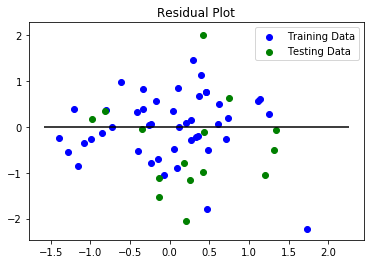

In [929]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [930]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1103788813116557, R2: 0.23314243119345257


In [969]:
# Assign X (data) and y (target)
X = feature[['TSA', 'CAR', 'NAO', 'TNA', 'El Nino']]
print(X.shape)

(70, 5)


In [970]:
# Make prediction for 2010-2015

nl = 66

X = X.values.reshape(-1,5) 

XX=X[61:nl]
print(XX)
yy = y[61:nl]
print(yy)
hur = pd.DataFrame(yy)
X_train, X_test, y_train, y_test = train_test_split(XX, hur, random_state=42)

[[ 1.8800e-01  1.0200e-01 -8.4000e-02  3.8600e-01  2.0834e+01]
 [-6.0000e-03  3.0800e-01 -1.1160e+00  6.1400e-01  2.1222e+01]
 [ 9.6000e-02  1.4600e-01  4.2600e-01  4.9800e-01  2.0304e+01]
 [ 1.0200e-01  3.1000e-01 -1.2800e-01  3.5800e-01  2.2104e+01]
 [ 1.1400e-01  4.7200e-01 -4.0800e-01  5.4600e-01  2.3448e+01]]
[8, 10, 2, 6, 3]


In [971]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [972]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [973]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

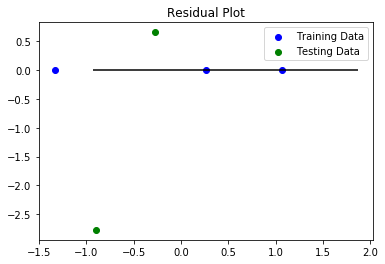

In [974]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [975]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4.053401302567162, R2: -1.0588705028912568


# Conclusion: NO CORRELATION

# Determine correlation for number of storms (1950-2009)

In [976]:
# Assign X (data) and y (target)
X = feature[['TSA', 'CAR', 'NAO', 'TNA', 'El Nino']]
print(X.shape)

(70, 5)


In [977]:
# y for ML
hurcount = []
for year in years:
    hurcount.append(storms[year]["NS"])
print(hurcount)

[15, 12, 11, 13, 15, 13, 9, 8, 11, 12, 8, 11, 5, 9, 11, 6, 11, 13, 12, 19, 12, 18, 10, 15, 12, 14, 11, 10, 18, 15, 16, 18, 8, 5, 16, 13, 8, 12, 13, 15, 16, 11, 8, 10, 10, 21, 13, 9, 14, 15, 18, 17, 14, 20, 16, 31, 11, 17, 17, 11, 21, 20, 19, 15, 9, 12]


In [979]:
# Split the data into training and testing
# 1950-2009
# nl 60 is 2009

from sklearn.model_selection import train_test_split


nl = 60

X = X.values.reshape(-1,5) 

XX=X[0:nl]
print(XX)
yy = y[0:nl]
print(yy)
hur1 = pd.DataFrame(yy)
X_train, X_test, y_train, y_test = train_test_split(XX, hur, random_state=42)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [961]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [962]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [963]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

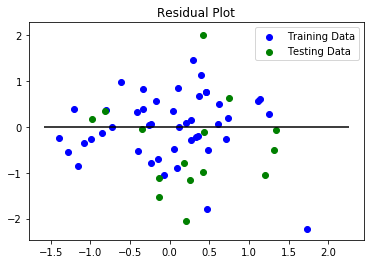

In [964]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")